# 1. Exploratory Data Analysis (EDA) --- Finance Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# 2. Data cleaning

Remove year 1992 has NAs for ENROLL and OTHER_EXPENDITURE column, thus remove all 1992 data

In [62]:
financeSum = '/home/yulu/MLData/elsect_summary.csv'
df = pd.read_csv(financeSum)

In [63]:
df.head()

STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  \
0     Alabama  1992     NaN        2678885           304177        1659028   
1      Alaska  1992     NaN        1049591           106780         720711   
2     Arizona  1992     NaN        3258079           297888        1369815   
3    Arkansas  1992     NaN        1711959           178571         958785   
4  California  1992     NaN       26260025          2072470       16546514   

   LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0         715680            2653798                  1481703   
1         222100             972488                   498362   
2        1590376            3401580                  1435908   
3         574603            1743022                   964323   
4        7641041           27138832                 14358922   

   SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE  
0                        735036                NaN                      174053  
1                        350902                NaN                       37451  
2                       1007732                NaN                      609114  
3                        483488                NaN                      145212  
4                       8520926                NaN                     2044688

In [64]:
df.isna().sum()

STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
dtype: int64

In [65]:
df = df.dropna(how = 'any').reset_index(drop = True)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 12 columns):
STATE                           1173 non-null object
YEAR                            1173 non-null int64
ENROLL                          1173 non-null float64
TOTAL_REVENUE                   1173 non-null int64
FEDERAL_REVENUE                 1173 non-null int64
STATE_REVENUE                   1173 non-null int64
LOCAL_REVENUE                   1173 non-null int64
TOTAL_EXPENDITURE               1173 non-null int64
INSTRUCTION_EXPENDITURE         1173 non-null int64
SUPPORT_SERVICES_EXPENDITURE    1173 non-null int64
OTHER_EXPENDITURE               1173 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1173 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 110.0+ KB


# 3. Data Explore

## 3.1 General

In [67]:
df.head()

STATE  YEAR     ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  \
0     Alabama  1993   727716.0        2827391           331409        1729295   
1      Alaska  1993   121156.0        1191398           176150         775829   
2     Arizona  1993   676297.0        3427976           318465        1415407   
3    Arkansas  1993   311432.0        1346909           128196         771079   
4  California  1993  5129788.0       28043338          2151157       17064146   

   LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0         766687            2833433                  1564558   
1         239419            1126398                   494917   
2        1694104            3623946                  1578889   
3         447634            1376067                   782791   
4        8828035           28110986                 15281147   

   SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE  
0                        794146           237222.0                      204207  
1                        433788            36291.0                      135791  
2                       1000914           164083.0                      680139  
3                        386526            68617.0                       97824  
4                       8914559          1608514.0                     1944760

In [68]:
df.describe()

YEAR        ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
count  1173.000000  1.173000e+03   1.173000e+03     1.173000e+03   
mean   2004.000000  9.160265e+05   9.113247e+06     7.754734e+05   
std       6.636079  1.063425e+06   1.161943e+07     1.152853e+06   
min    1993.000000  4.386600e+04   4.656500e+05     3.367200e+04   
25%    1998.000000  2.629350e+05   2.191695e+06     1.918400e+05   
50%    2004.000000  6.480840e+05   5.169926e+06     4.100510e+05   
75%    2010.000000  1.009200e+06   1.084872e+07     8.354640e+05   
max    2015.000000  6.307022e+06   7.824804e+07     9.990221e+06   

       STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
count   1.173000e+03   1.173000e+03       1.173000e+03   
mean    4.229166e+06   4.108608e+06       9.227706e+06   
std     5.470060e+06   5.418146e+06       1.188887e+07   
min     0.000000e+00   2.391700e+04       4.816650e+05   
25%     1.182776e+06   7.159800e+05       2.178778e+06   
50%     2.545353e+06   2.083075e+06       5.298267e+06   
75%     5.132066e+06   4.742205e+06       1.074668e+07   
max     4.318764e+07   3.494151e+07       7.836596e+07   

       INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
count             1.173000e+03                  1.173000e+03   
mean              4.771083e+06                  2.686234e+06   
std               6.225092e+06                  3.325406e+06   
min               2.655490e+05                  1.399630e+05   
25%               1.177781e+06                  6.420900e+05   
50%               2.701637e+06                  1.545738e+06   
75%               5.585476e+06                  3.217615e+06   
max               4.195426e+07                  2.350185e+07   

       OTHER_EXPENDITURE  CAPITAL_OUTLAY_EXPENDITURE  
count       1.173000e+03                1.173000e+03  
mean        4.231043e+05                9.156847e+05  
std         5.248700e+05                1.340665e+06  
min         1.154100e+04                1.270800e+04  
25%         1.005860e+05                1.858500e+05  
50%         2.691570e+05                5.119440e+05  
75%         5.105030e+05                9.828930e+05  
max         3.759373e+06                1.022366e+07

## 3.2 Check 'FEDERAL_REVENUE' +  'STATE_REVENUE' + 'LOCAL_REVENUE' == "TOTAL_REVENUE'

In [69]:
(df[['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE']].sum(axis = 1) == df.TOTAL_REVENUE).to_frame()

0
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
...    ...
1143  True
1144  True
1145  True
1146  True
1147  True
1148  True
1149  True
1150  True
1151  True
1152  True
1153  True
1154  True
1155  True
1156  True
1157  True
1158  True
1159  True
1160  True
1161  True
1162  True
1163  True
1164  True
1165  True
1166  True
1167  True
1168  True
1169  True
1170  True
1171  True
1172  True

[1173 rows x 1 columns]

## 3.3 Check relation of  'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE' to 'TOTAL_EXPENDITURE'

### 3.3.1 Sum expenditure equals to total expenditure

In [70]:
(df[[ 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']].sum(axis = 1) == df.TOTAL_EXPENDITURE).sum()

41

### 3.3.2 Sum expenditure smaller than total expenditure

In [71]:
(df[[ 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']].sum(axis = 1) <  df.TOTAL_EXPENDITURE).sum()

1132

In [72]:
tdf = df[df[[ 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']].sum(axis = 1) <  df.TOTAL_EXPENDITURE]

In [73]:
tdf[[ 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']].sum(axis = 1)  - tdf.TOTAL_EXPENDITURE

0        -33300.0
1        -25611.0
2       -199921.0
3        -40309.0
4       -362006.0
5       -125437.0
6       -256063.0
7        -18084.0
9       -258450.0
10       -85711.0
12       -16503.0
13      -592794.0
14      -440370.0
15      -237411.0
16       -71677.0
17       -44958.0
18       -94992.0
19       -60550.0
20       -56414.0
21      -470330.0
22      -681131.0
23      -227628.0
24       -18321.0
25      -127605.0
26       -11593.0
27       -46808.0
28       -55349.0
29       -81064.0
30      -326427.0
31       -16984.0
          ...    
1143    -621984.0
1144   -1063160.0
1145    -555881.0
1146     -55419.0
1147    -401562.0
1148     -41348.0
1149    -102169.0
1150    -172975.0
1151    -208131.0
1152   -1493435.0
1153     -74859.0
1154   -1348671.0
1155    -572549.0
1156     -81444.0
1157    -943687.0
1158     -64564.0
1159    -360888.0
1160   -2722041.0
1161     -70795.0
1162    -391982.0
1163     -36441.0
1164    -242663.0
1165   -4815353.0
1166    -125930.0
1167    -2

### 3.3.3 Sum expenditure equals to total expenditure

In [74]:
(df[[ 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']].sum(axis = 1) > df.TOTAL_EXPENDITURE).sum()

0

### 3.3.4 Add additional column to compensate unknow and total know expenditure

In [75]:
df['TOTAL_KNOWN_EXPENDITURE'] = df[[ 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']].sum(axis = 1)
df['UNKNOWN_EXPENDITURE'] = df.TOTAL_EXPENDITURE - df.TOTAL_KNOWN_EXPENDITURE

## 3.4 Add REVENUE PER ENROLL COLUMN

In [76]:
df['REV_PER_ENROLL'] = df['TOTAL_REVENUE'] / df['ENROLL']

## 3.5 Done

In [77]:
df.head()

STATE  YEAR     ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  \
0     Alabama  1993   727716.0        2827391           331409        1729295   
1      Alaska  1993   121156.0        1191398           176150         775829   
2     Arizona  1993   676297.0        3427976           318465        1415407   
3    Arkansas  1993   311432.0        1346909           128196         771079   
4  California  1993  5129788.0       28043338          2151157       17064146   

   LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0         766687            2833433                  1564558   
1         239419            1126398                   494917   
2        1694104            3623946                  1578889   
3         447634            1376067                   782791   
4        8828035           28110986                 15281147   

   SUPPORT_SERVICES_EXPENDITURE  OTHER_EXPENDITURE  \
0                        794146           237222.0   
1                        433788            36291.0   
2                       1000914           164083.0   
3                        386526            68617.0   
4                       8914559          1608514.0   

   CAPITAL_OUTLAY_EXPENDITURE  TOTAL_KNOWN_EXPENDITURE  UNKNOWN_EXPENDITURE  \
0                      204207                2800133.0              33300.0   
1                      135791                1100787.0              25611.0   
2                      680139                3424025.0             199921.0   
3                       97824                1335758.0              40309.0   
4                     1944760               27748980.0             362006.0   

   REV_PER_ENROLL  
0        3.885295  
1        9.833586  
2        5.068743  
3        4.324890  
4        5.466764

## 3.6 Enroll

Data pivoting for enrollment of each state in all different years

In [10]:
state_group = df.groupby('STATE')

<Figure size 432x288 with 0 Axes>

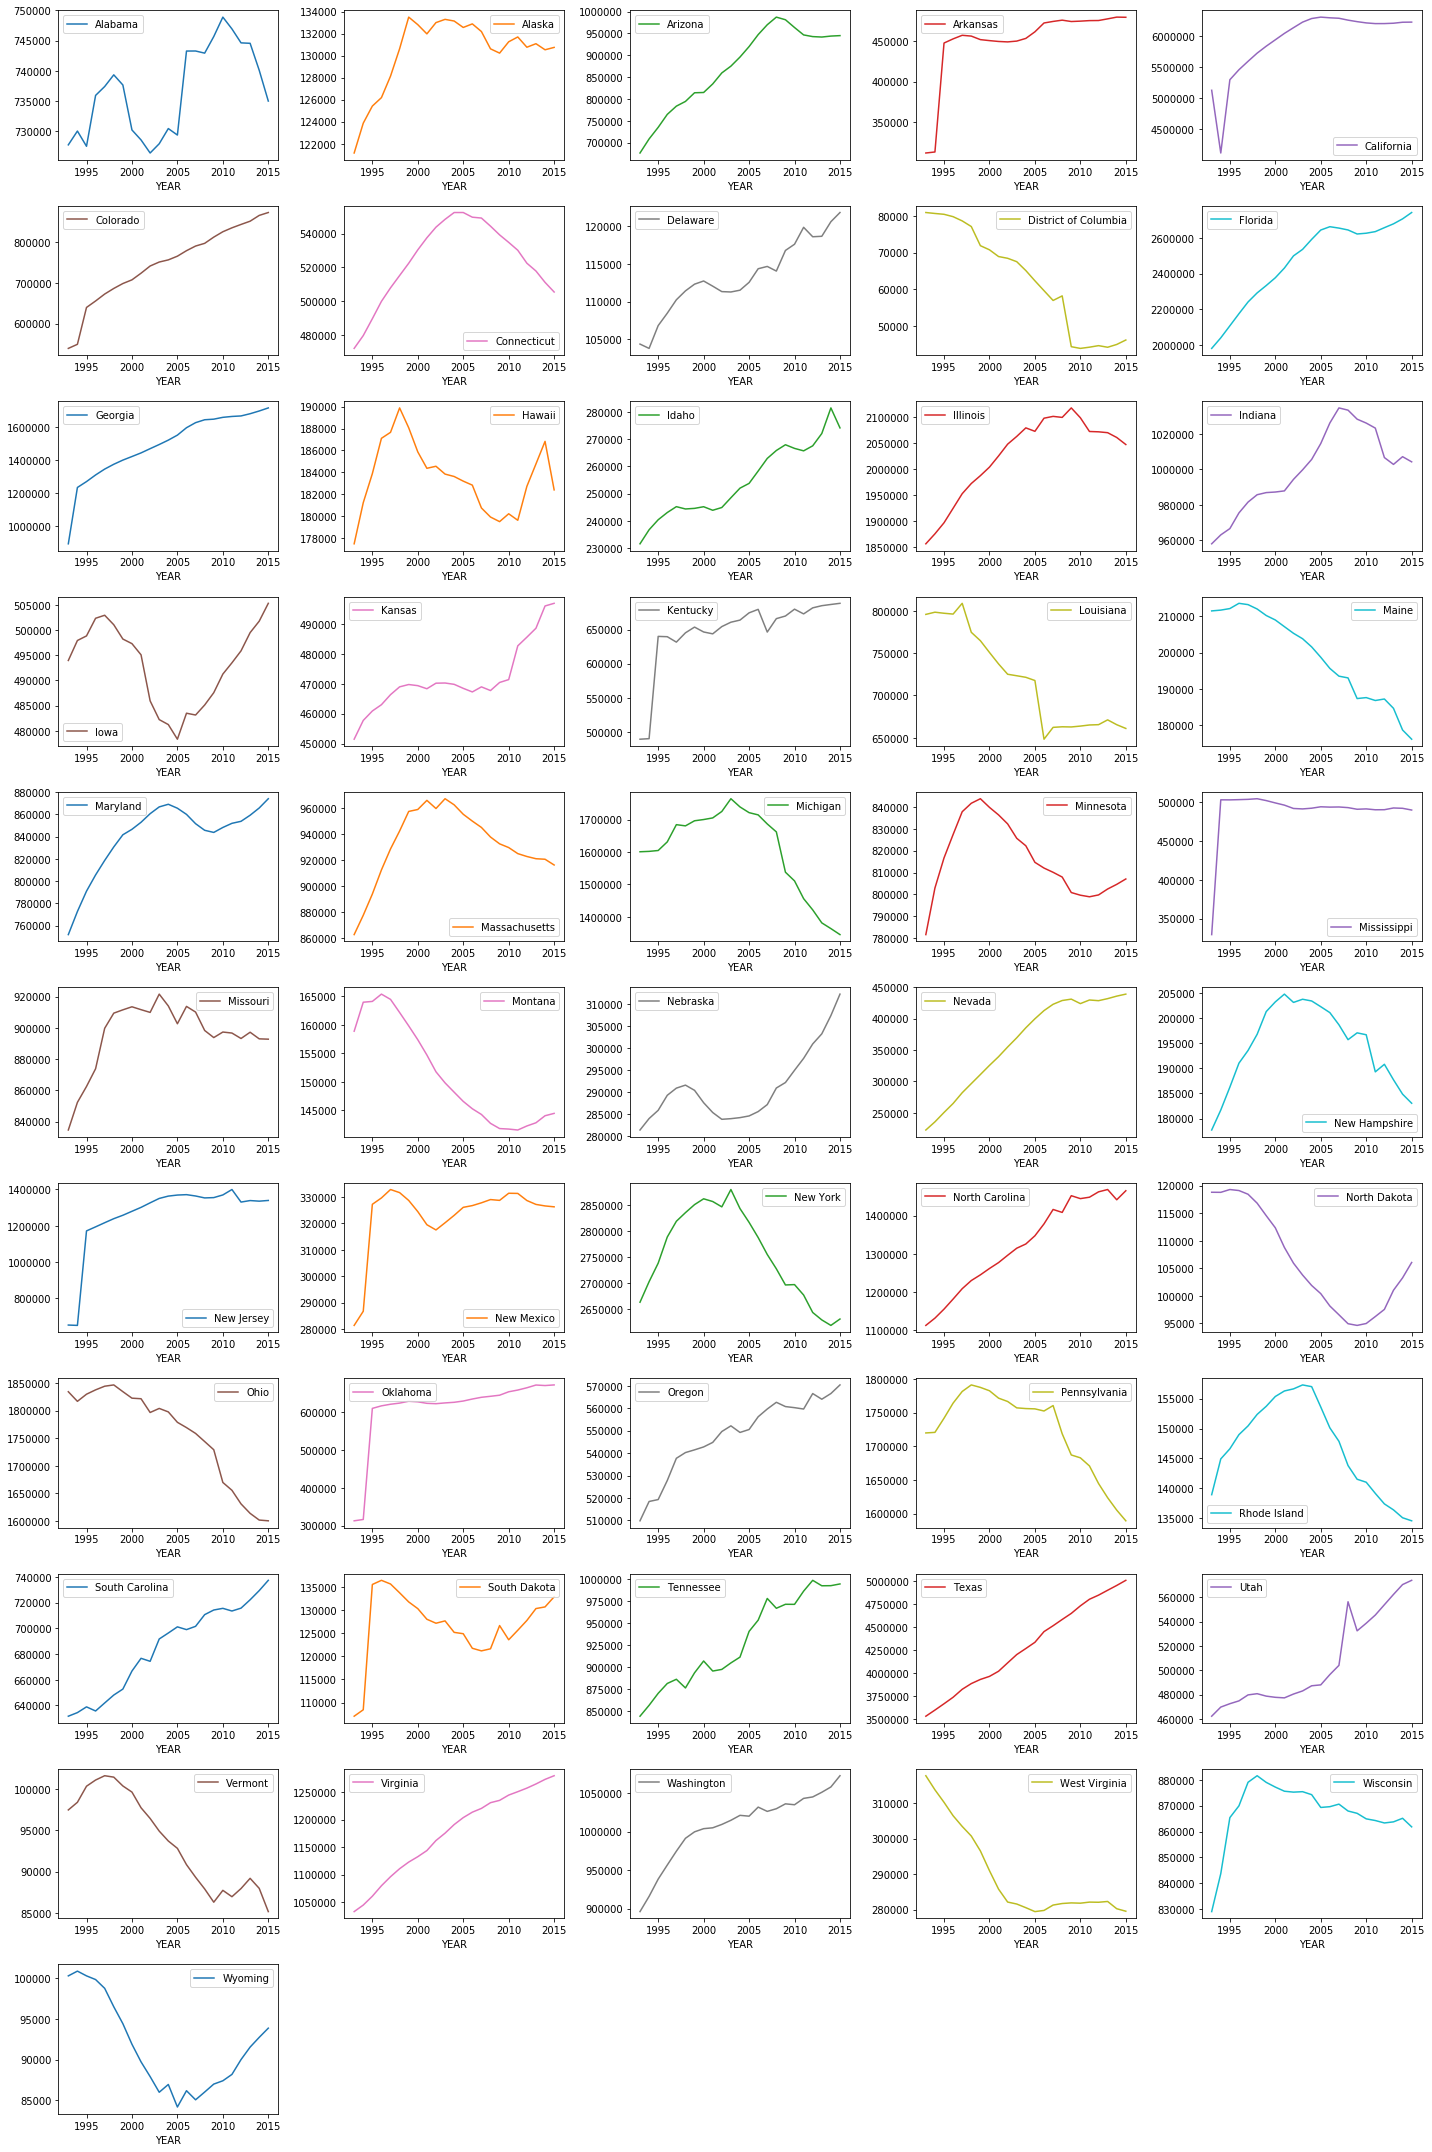

In [11]:
_ = plt.figure()
_ = df.pivot(index = 'YEAR', columns = 'STATE', values='ENROLL').plot(
    kind='line', subplots=True, layout=(11, 5), figsize = (20, 30), sharex = False)
plt.tight_layout()
plt.show()

## 3.7 TOTAL_REVENUE |  TOTAL_EXPENDITURE

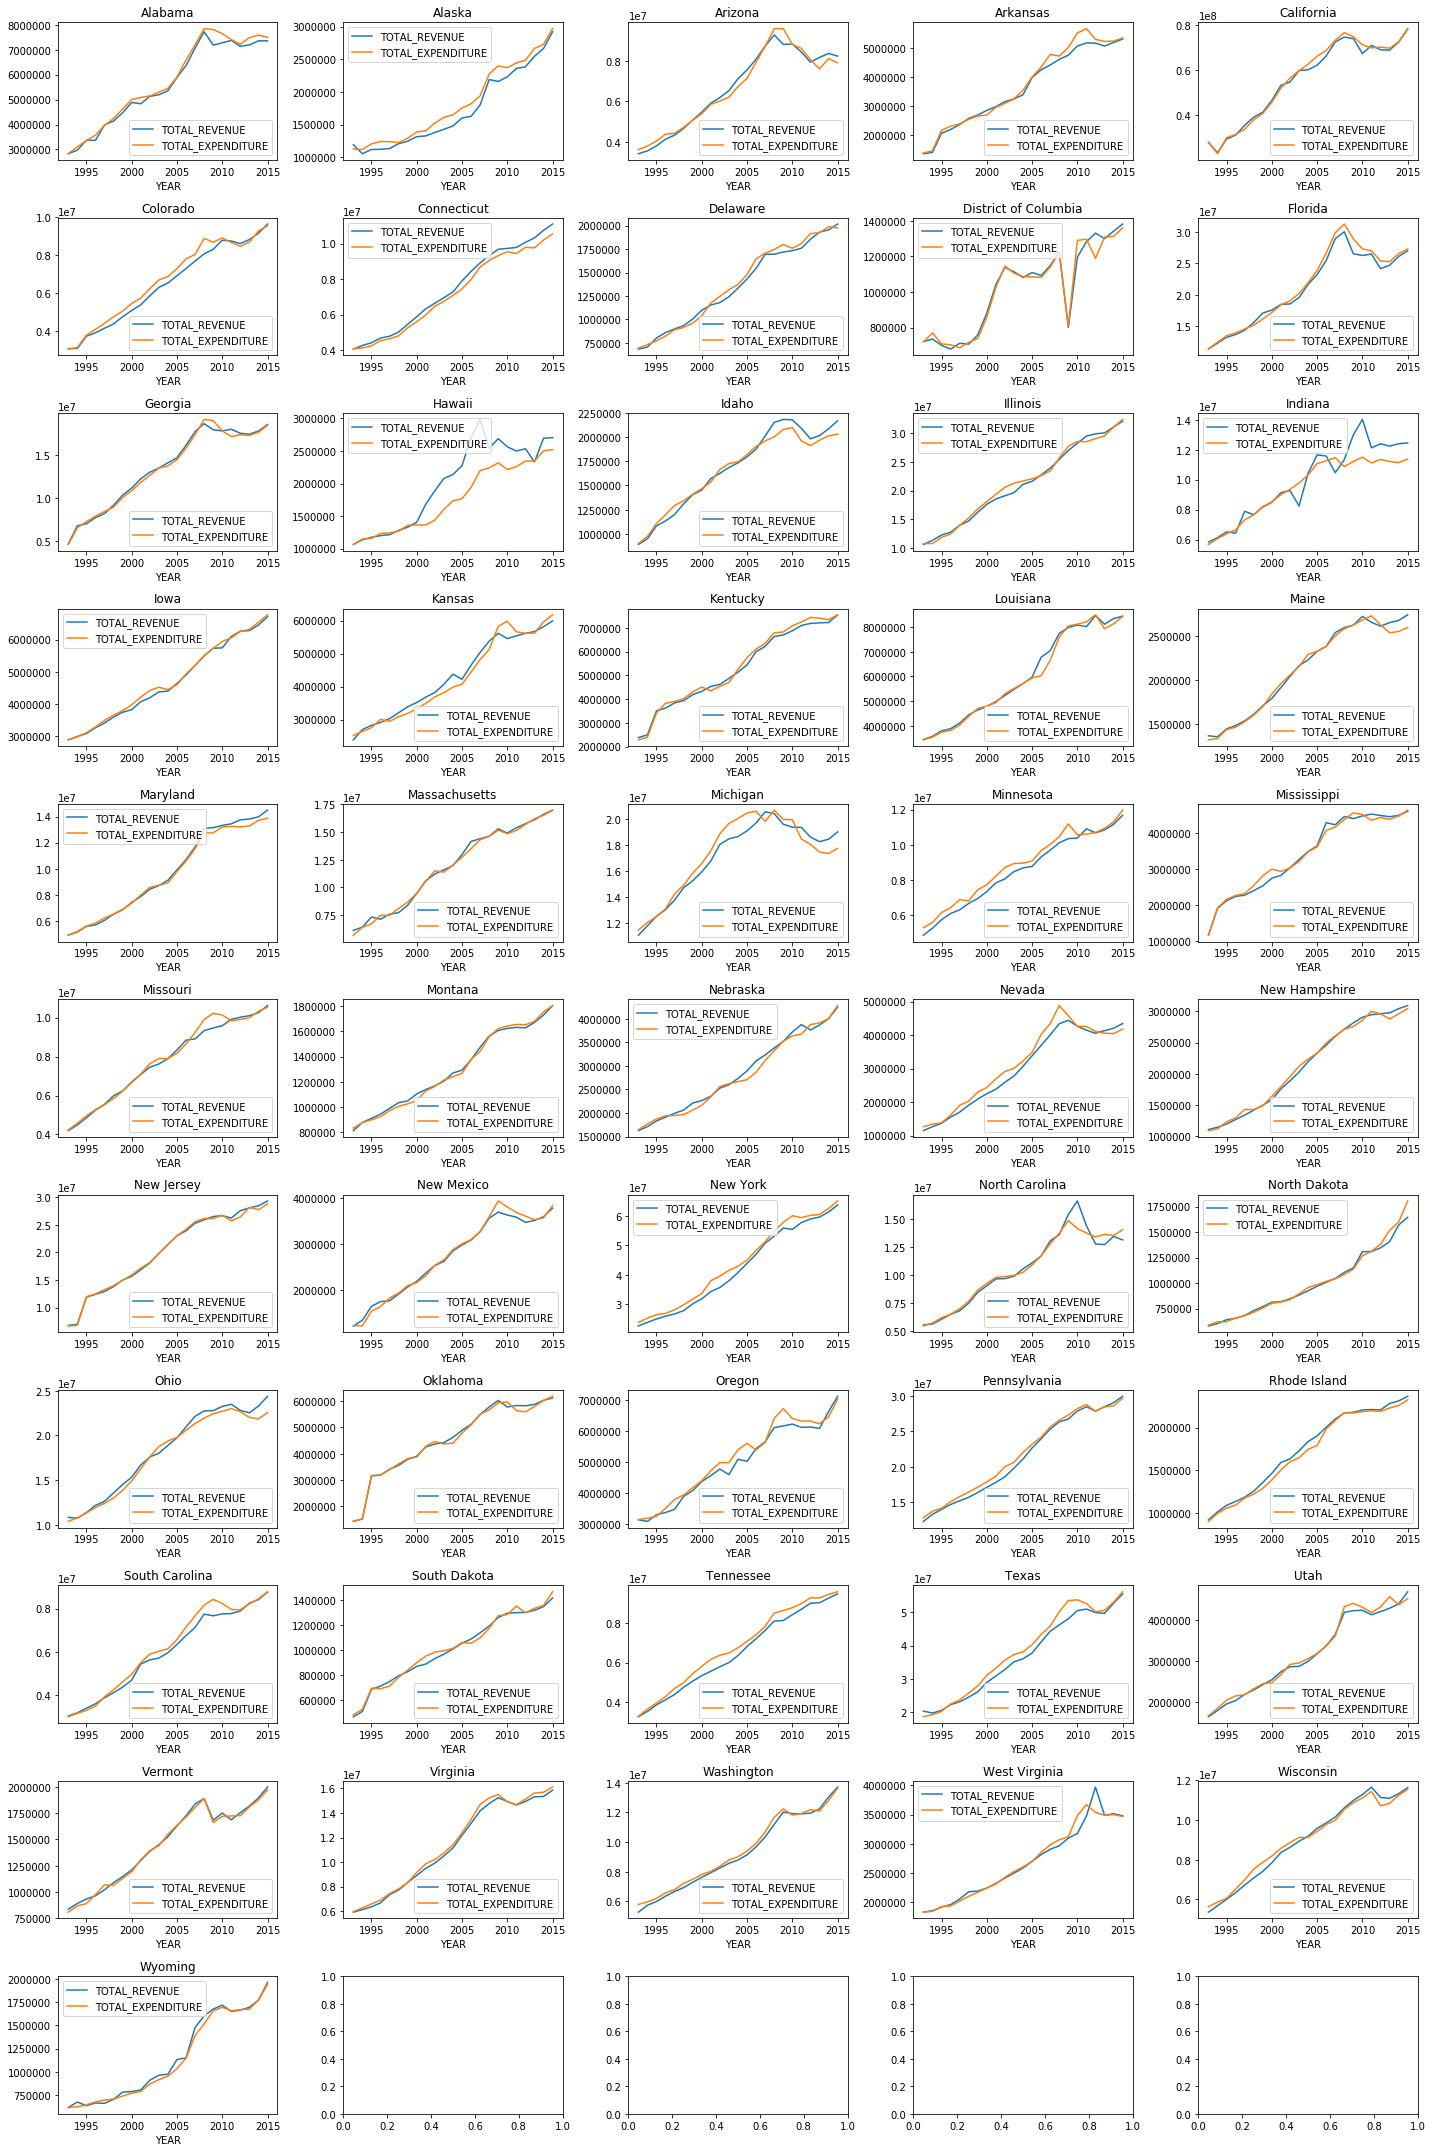

In [12]:
fig, axes = plt.subplots(11, 5, figsize = (20, 30))
axes = axes.flatten()
for ax, d in zip(axes, state_group):
    d[1].plot(x = 'YEAR', y = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'], ax = ax, label = 0, title = d[0], kind = 'line')
plt.tight_layout() 

## 3.8 TOTAL_REVENUE / ENROLL

In [13]:
state_sort = df[df.YEAR == 2015][['STATE', 'REV_PER_ENROLL']].sort_values(by = 'REV_PER_ENROLL').STATE

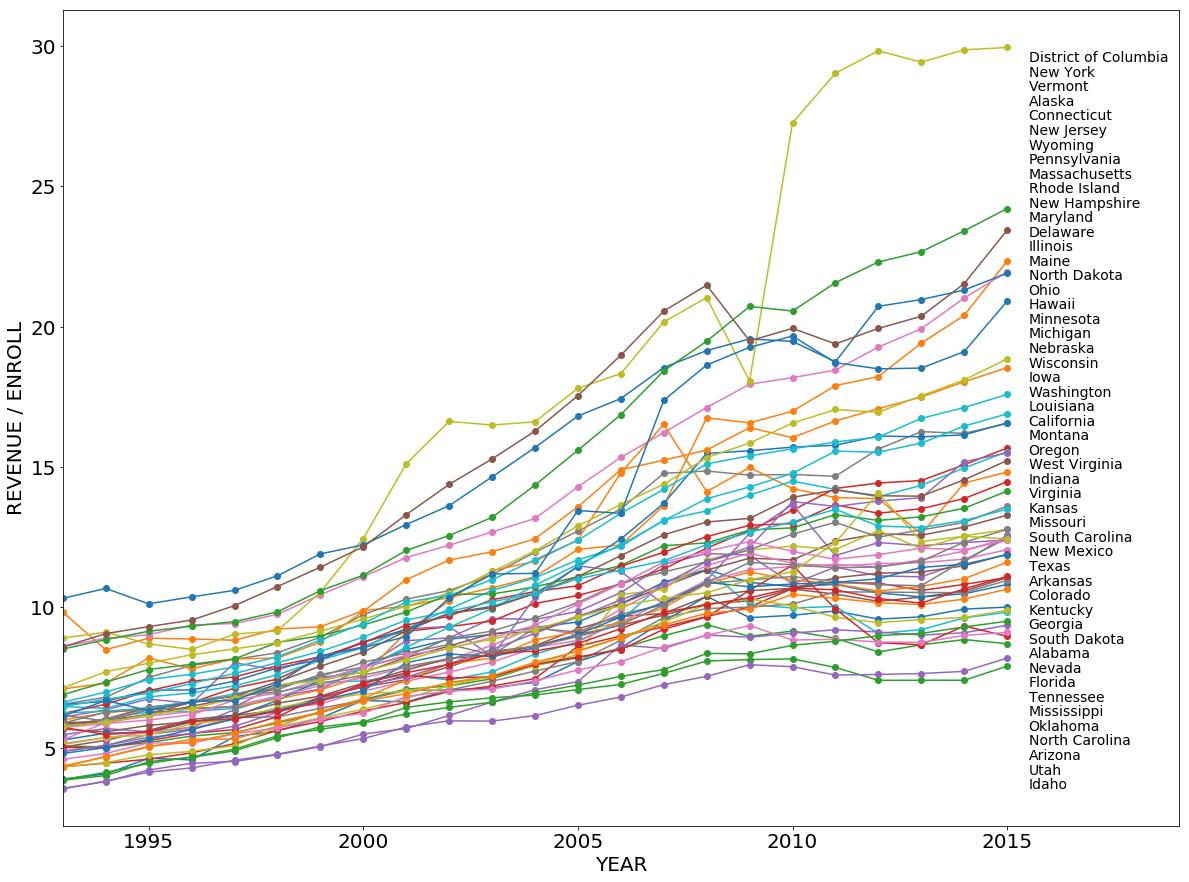

In [14]:
fig, ax = plt.subplots( figsize = (20, 15))
max_rev = state_group.REV_PER_ENROLL.max().max()
min_rev = state_group.REV_PER_ENROLL.min().min()
step = (max_rev  - min_rev) / 51
for d in state_group:
    d[1].plot(x = 'YEAR', y = 'REV_PER_ENROLL', kind = 'line', ax = ax, style = 'o-', legend = False, fontsize= 20)
for i, st in enumerate(state_sort):
    ax.text(2015.5, i * step + min_rev, st, fontsize = 14)
    #ax.text(2016, d[1].REV_PER_ENROLL.iloc[-1], d[0])
    #ax.text(2016, d[1].REV_PER_ENROLL.max(), d[0])
ax.set_ylabel('REVENUE / ENROLL', fontsize = 20)
ax.set_xlabel('YEAR', fontsize = 20)
_= ax.set_xlim([1993, 2019])

    

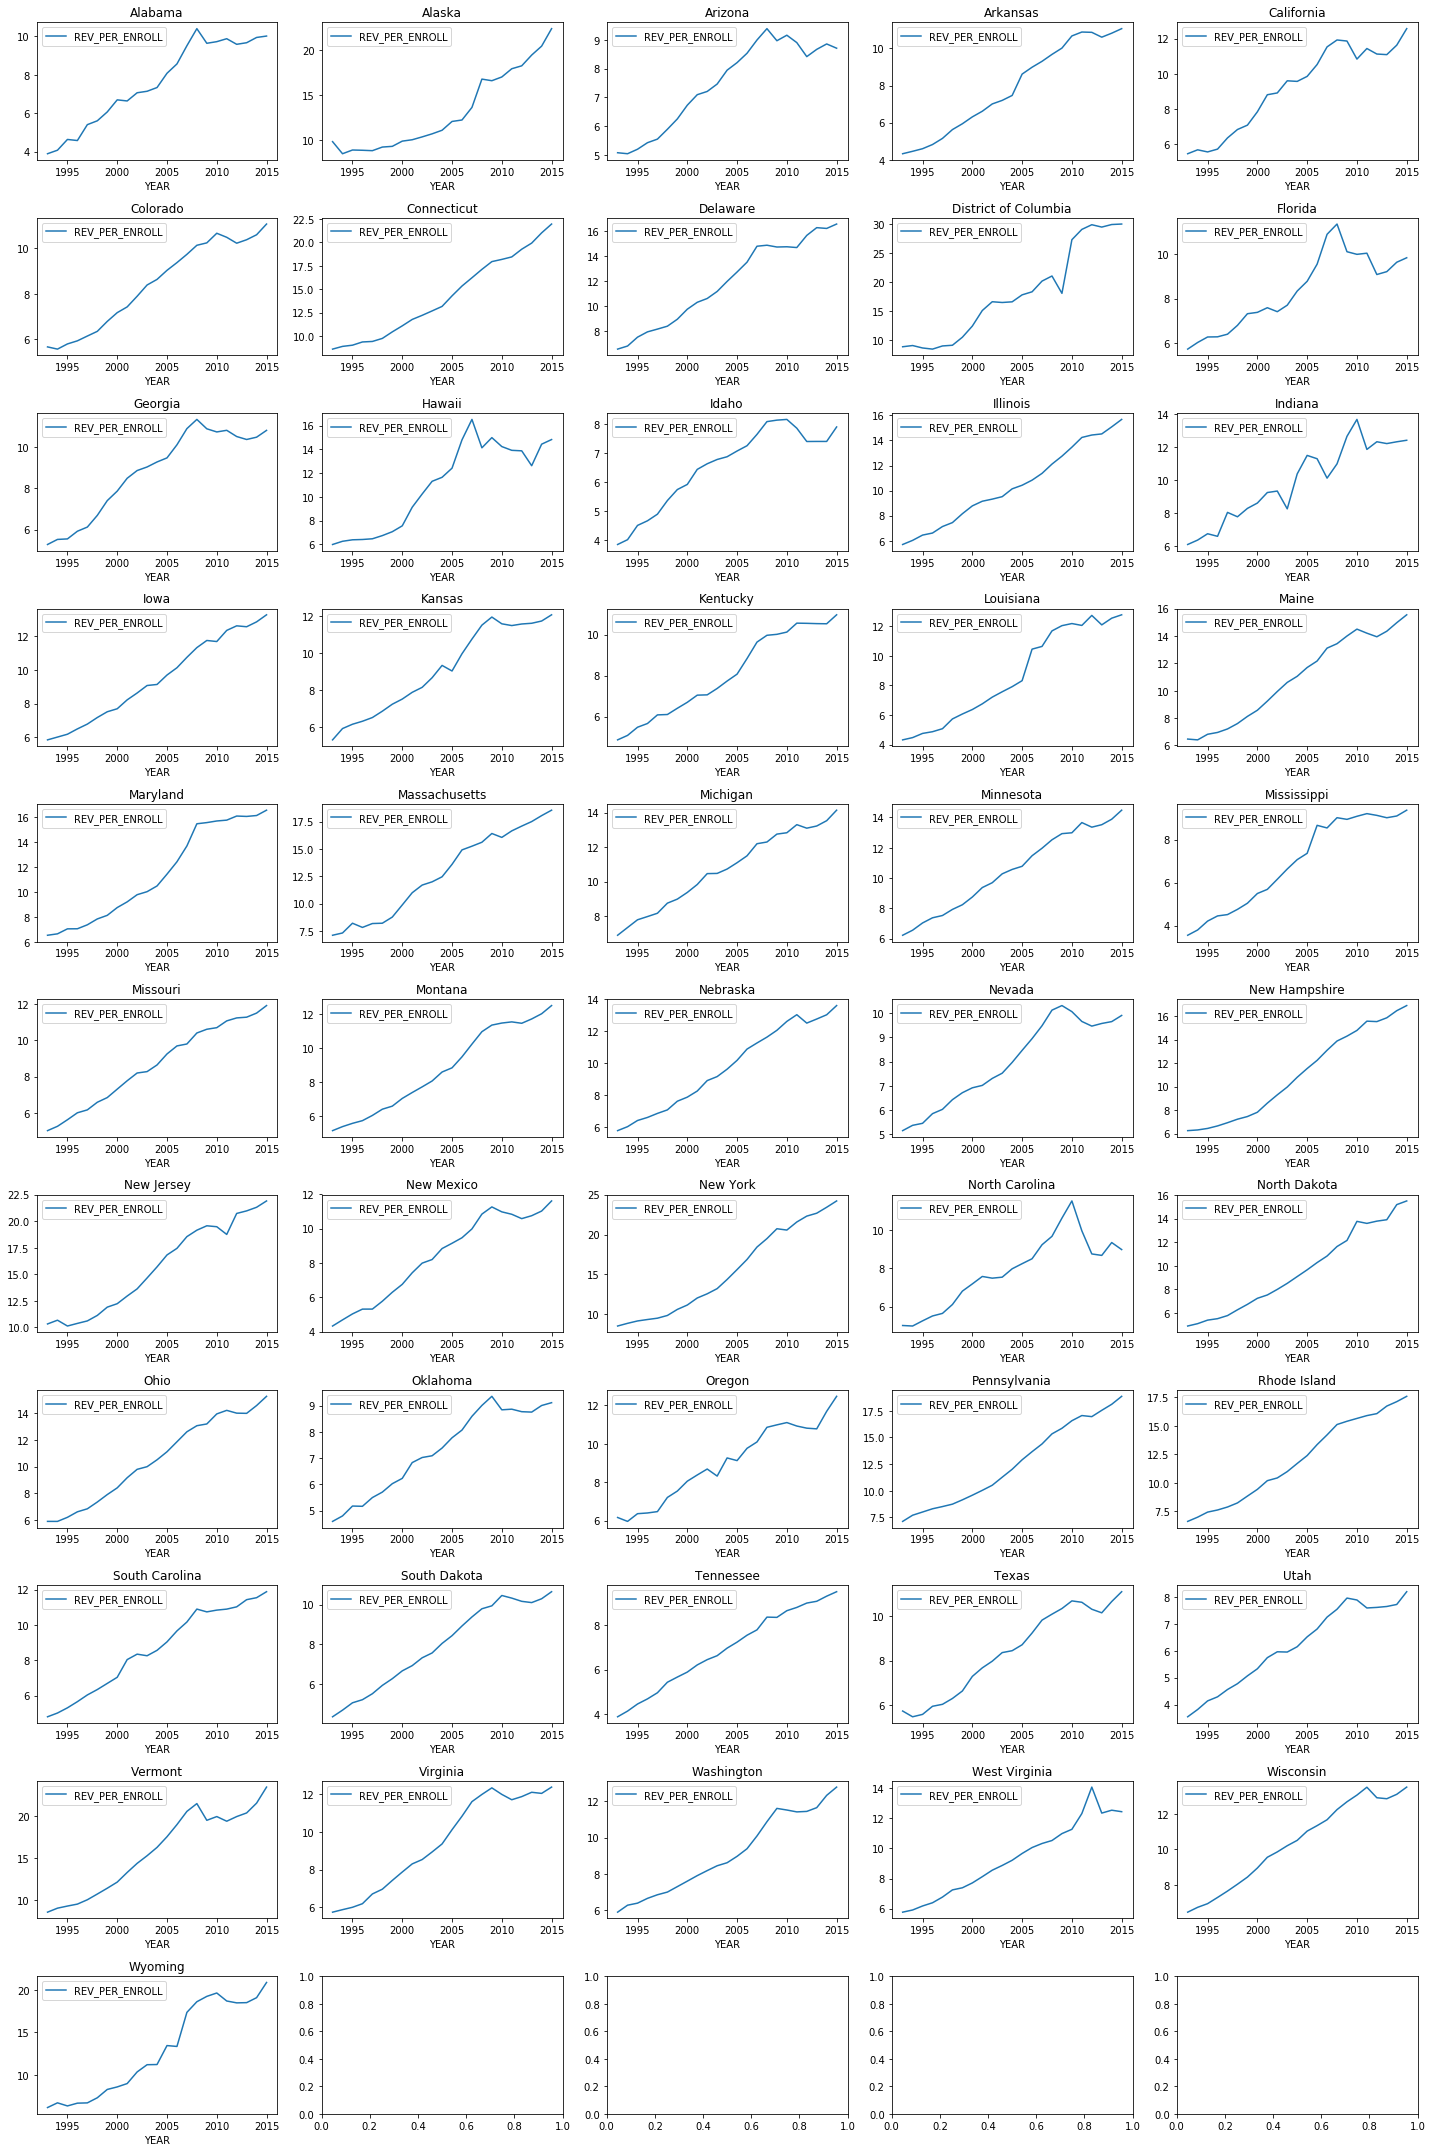

In [15]:
fig, axes = plt.subplots(11, 5, figsize = (20, 30))
axes = axes.flatten()
for ax, d in zip(axes, df.groupby('STATE')):
    d[1].plot(x = 'YEAR', y = 'REV_PER_ENROLL', kind = 'line', ax = ax, title = d[0])
plt.tight_layout()

## 3.9 REVENUE category analysis

In [84]:
rev_df = pd.melt(df, id_vars=['STATE', 'YEAR', 'TOTAL_REVENUE'], value_vars=['FEDERAL_REVENUE',
       'STATE_REVENUE', 'LOCAL_REVENUE'], var_name = 'REVENUE_CATEGORY', value_name = 'REVENUE')
rev_df.head()

STATE  YEAR  TOTAL_REVENUE REVENUE_CATEGORY  REVENUE
0     Alabama  1993        2827391  FEDERAL_REVENUE   331409
1      Alaska  1993        1191398  FEDERAL_REVENUE   176150
2     Arizona  1993        3427976  FEDERAL_REVENUE   318465
3    Arkansas  1993        1346909  FEDERAL_REVENUE   128196
4  California  1993       28043338  FEDERAL_REVENUE  2151157

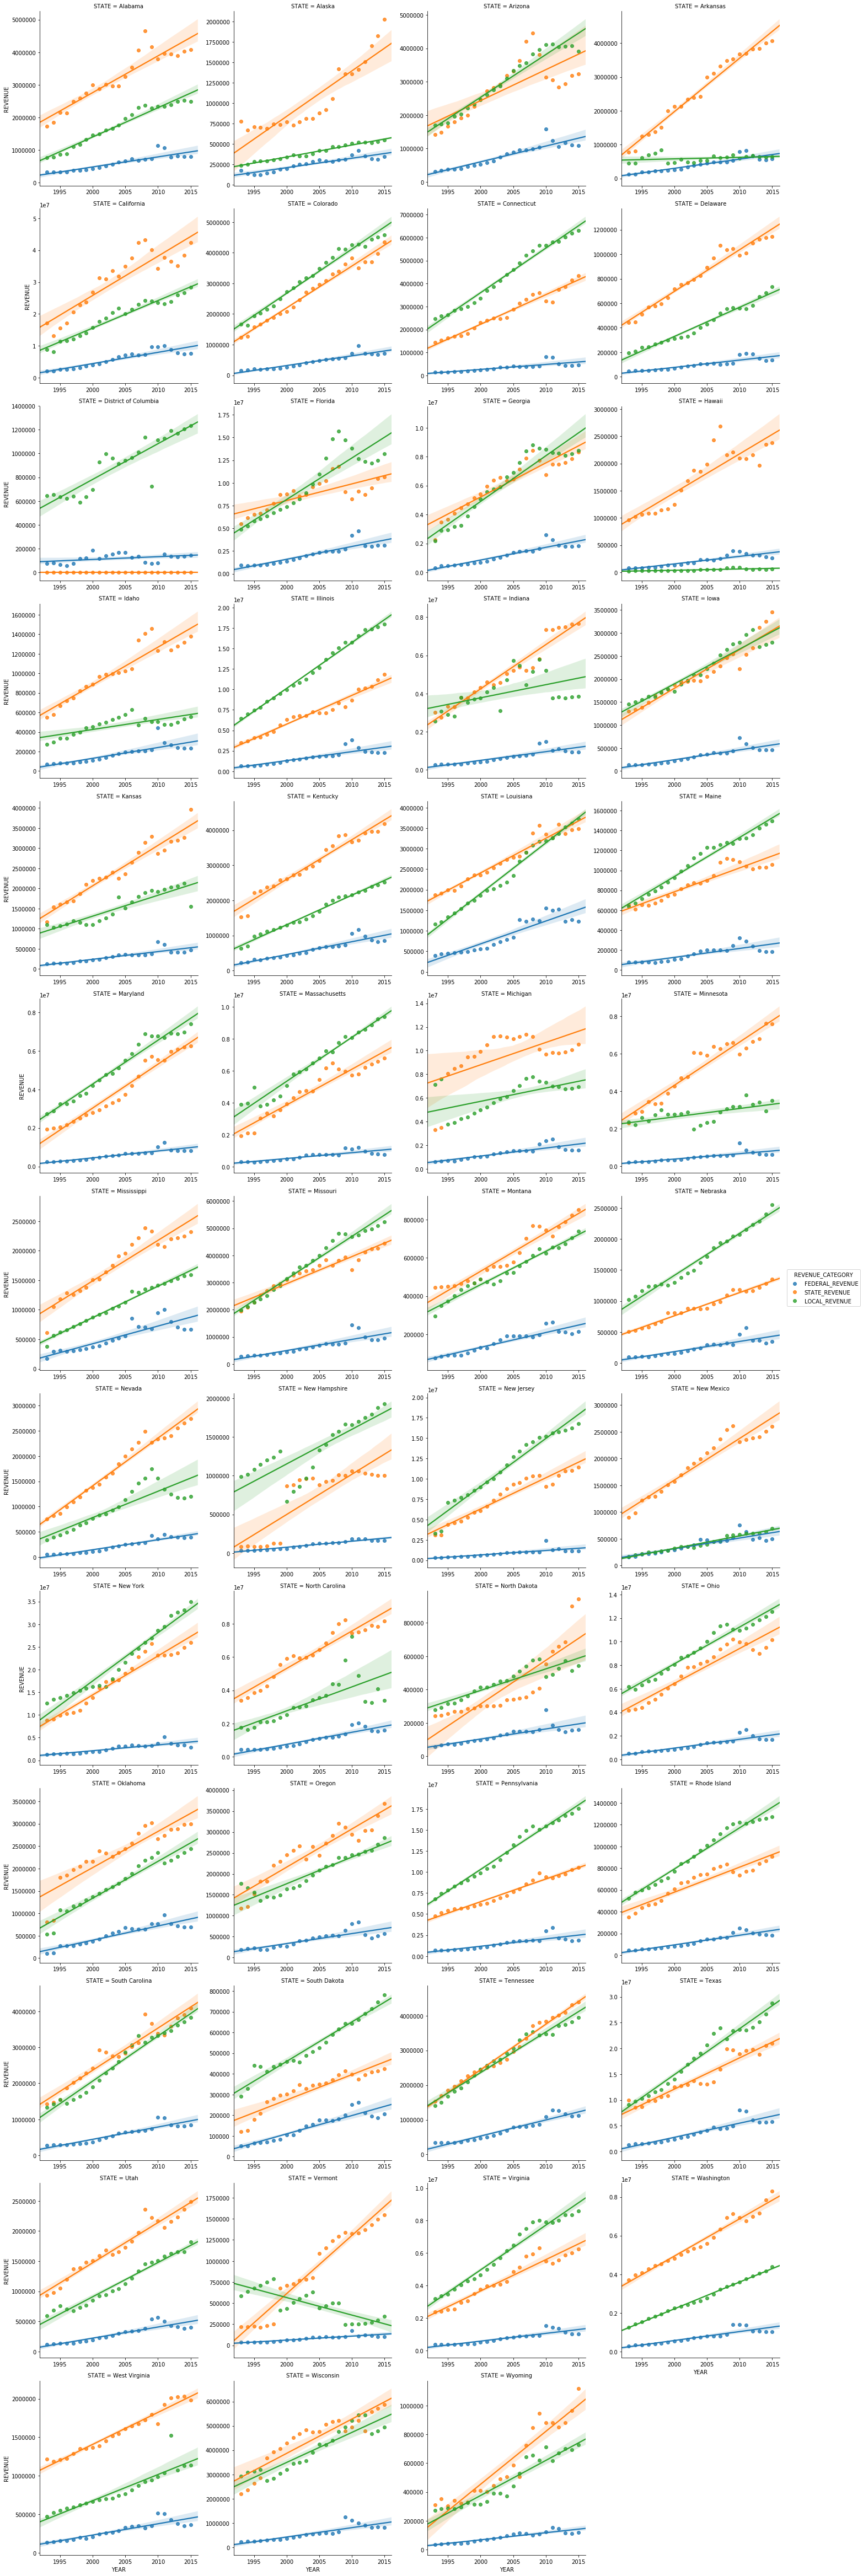

In [89]:
sns.lmplot(data = rev_df, x ='YEAR', y = 'REVENUE', hue = 'REVENUE_CATEGORY', col = 'STATE', col_wrap=4, sharex = False, sharey = False)

## 3.10 EXPENDITURE category analysis

In [102]:
exp_df = pd.melt(df, id_vars=['STATE', 'YEAR', 'TOTAL_EXPENDITURE'], value_vars=['INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE'], var_name = 'EXPENDITURE_CATEGORY', value_name = 'EXPENDITURE')
exp_df['EXPENDITURE_PERCENT'] = exp_df.EXPENDITURE / exp_df.TOTAL_EXPENDITURE
exp_df.head()

STATE  YEAR  TOTAL_EXPENDITURE     EXPENDITURE_CATEGORY  EXPENDITURE  \
0     Alabama  1993            2833433  INSTRUCTION_EXPENDITURE    1564558.0   
1      Alaska  1993            1126398  INSTRUCTION_EXPENDITURE     494917.0   
2     Arizona  1993            3623946  INSTRUCTION_EXPENDITURE    1578889.0   
3    Arkansas  1993            1376067  INSTRUCTION_EXPENDITURE     782791.0   
4  California  1993           28110986  INSTRUCTION_EXPENDITURE   15281147.0   

   EXPENDITURE_PERCENT  
0             0.552178  
1             0.439380  
2             0.435682  
3             0.568861  
4             0.543601

### 3.10.1 Expenditure by category

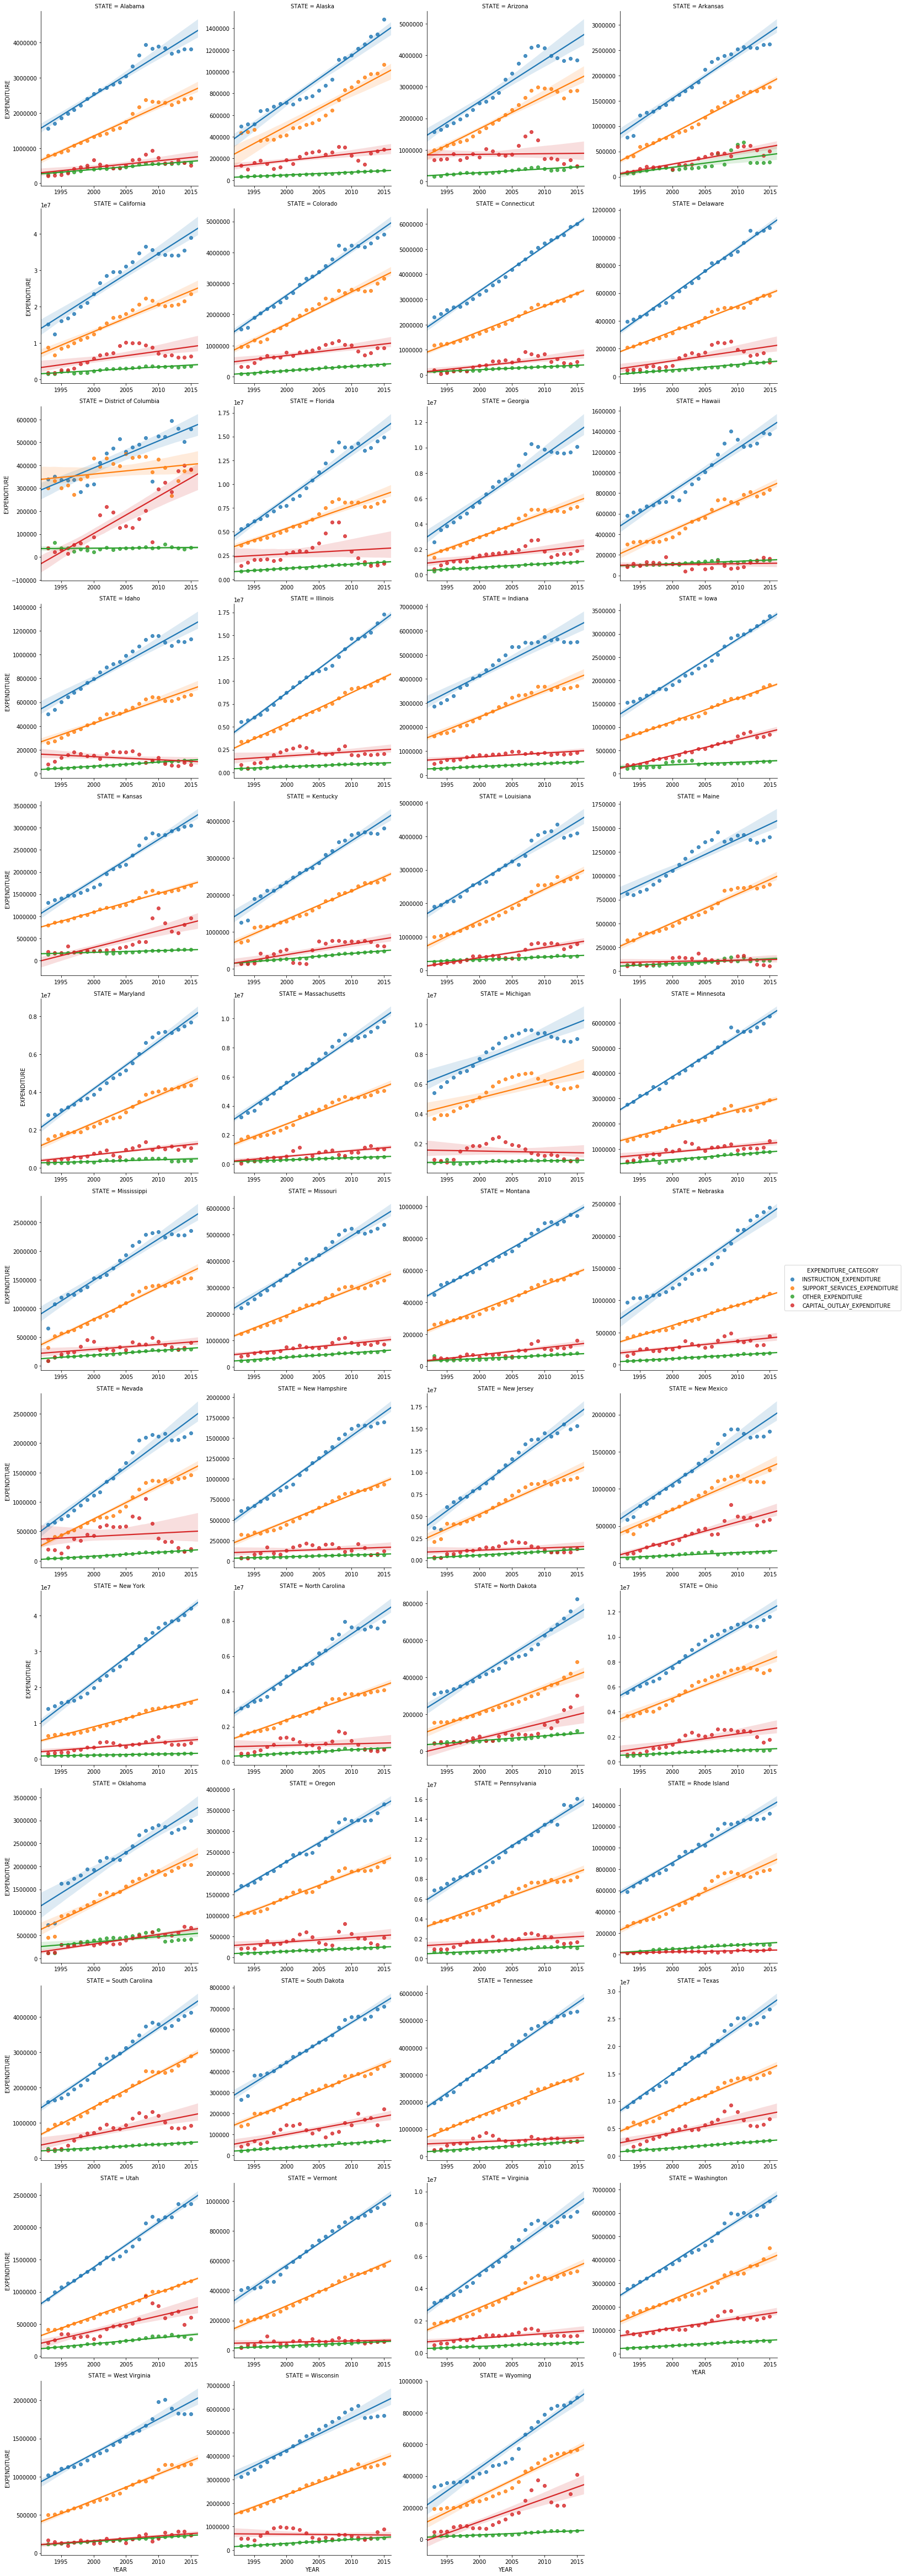

In [92]:
sns.lmplot(data = exp_df, x ='YEAR', y = 'EXPENDITURE', hue = 'EXPENDITURE_CATEGORY', col = 'STATE', col_wrap=4, sharex = False, sharey = False)

### 3.10.2 Expenditure percent by category

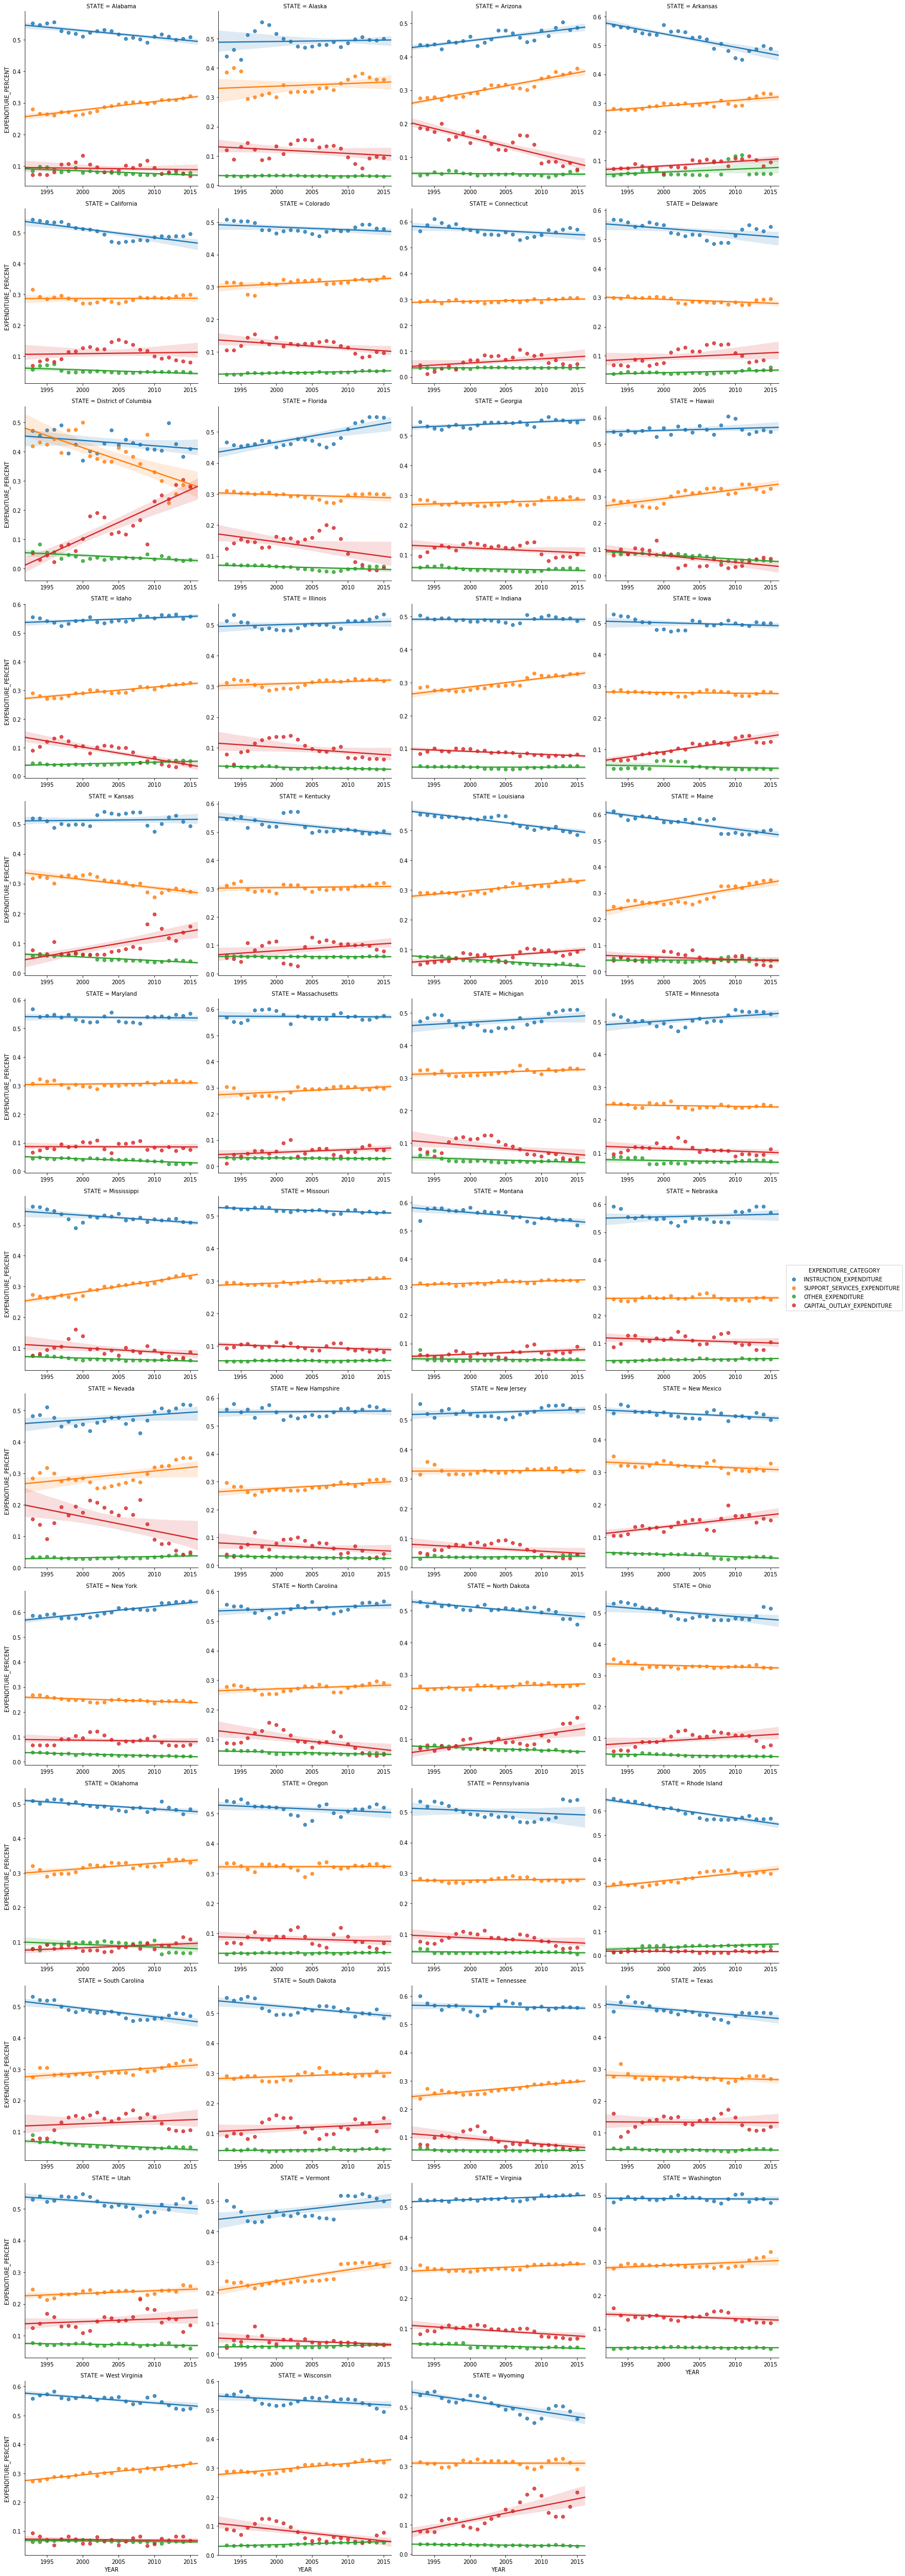

In [104]:
sns.lmplot(data = exp_df, x ='YEAR', y = 'EXPENDITURE_PERCENT', hue = 'EXPENDITURE_CATEGORY', col = 'STATE', col_wrap=4, sharex = False, sharey = False)

# 4. Relation discovery

## 4.1 TOTAL_REVENUE vs YEAR

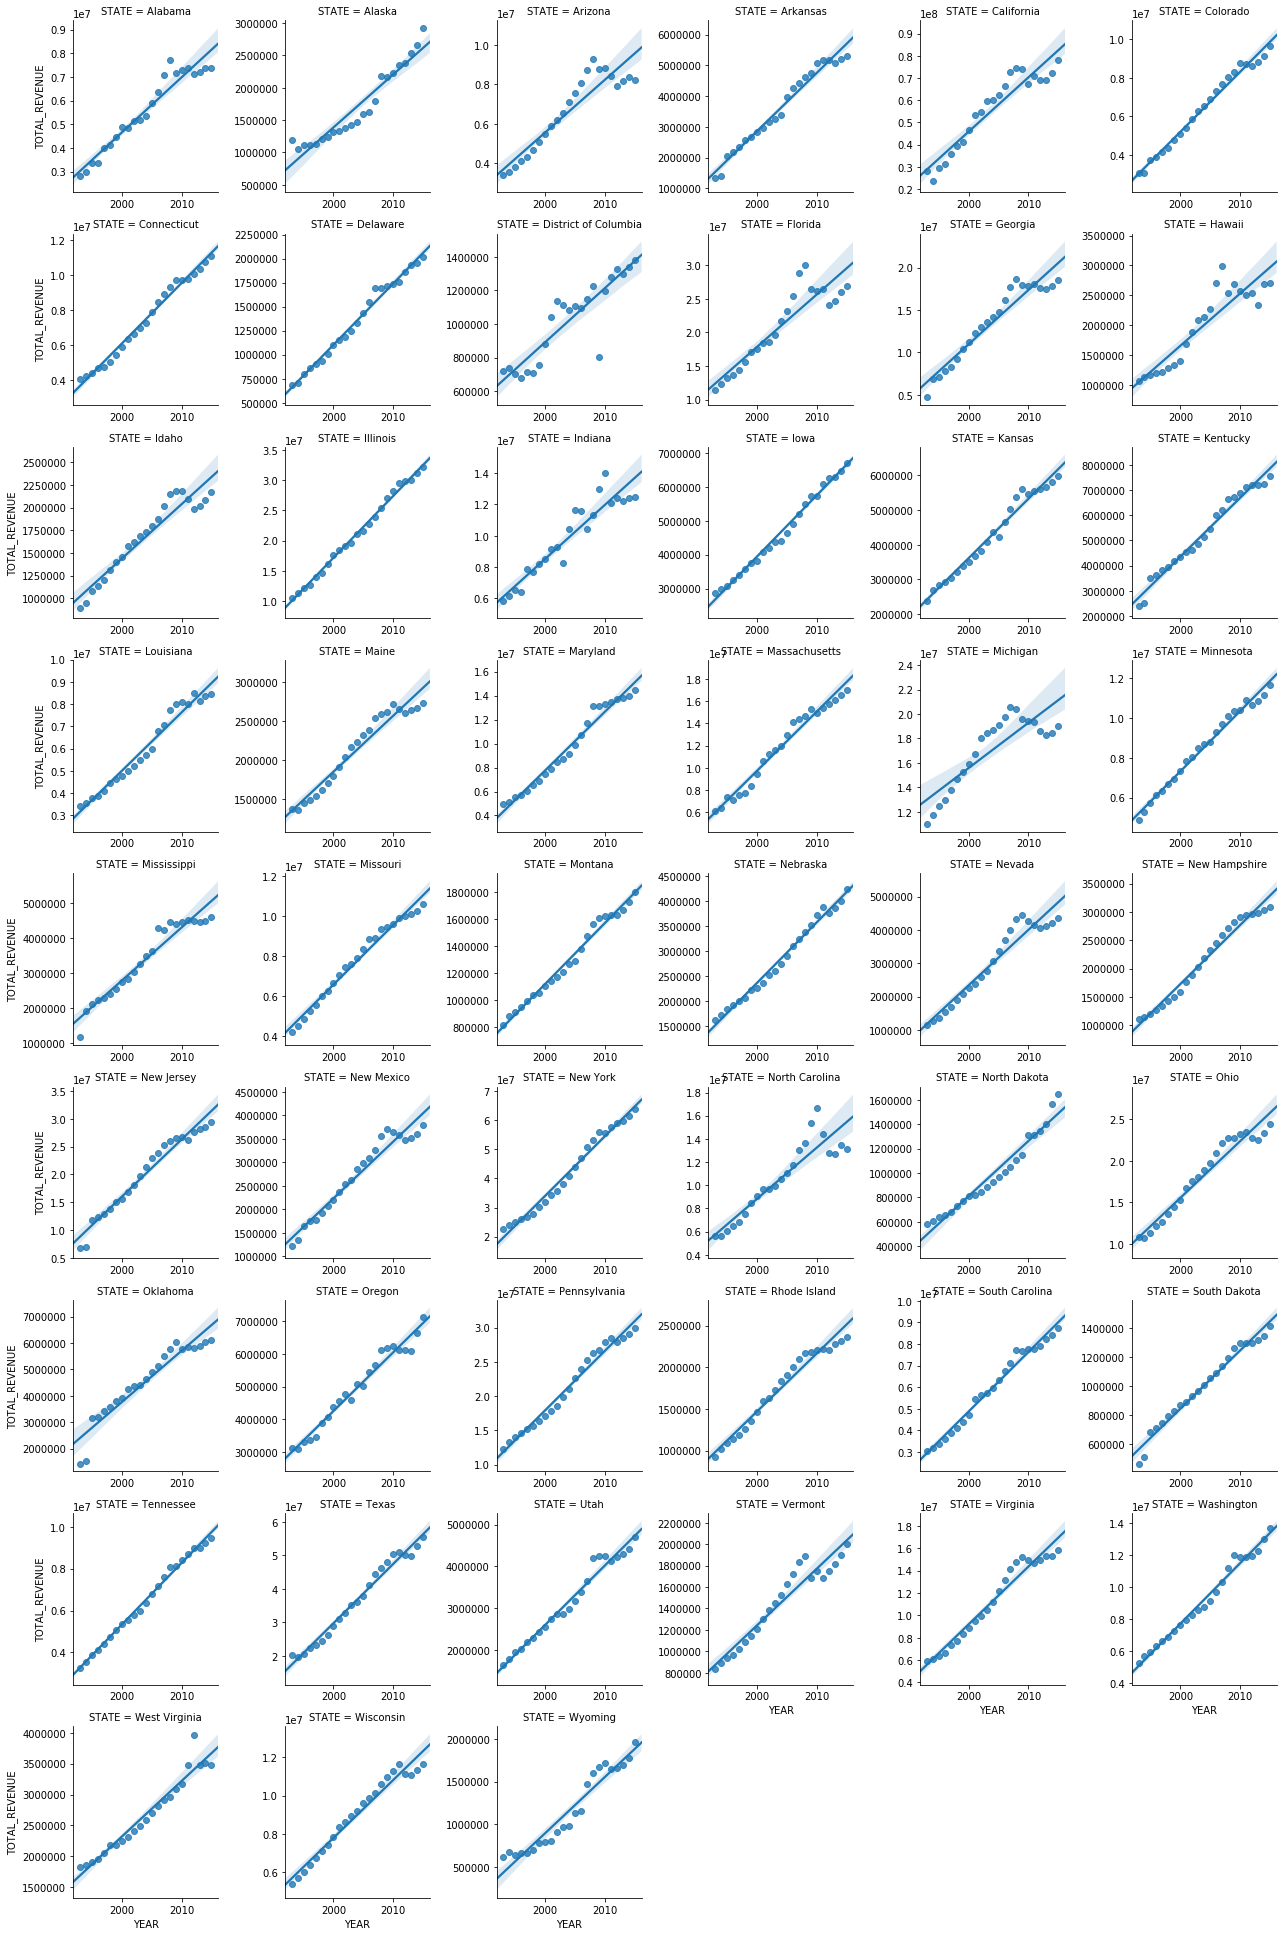

In [17]:
g = sns.FacetGrid(df, col = 'STATE',  sharey = False, sharex = False, col_wrap=6)
g.map(sns.regplot, 'YEAR', 'TOTAL_REVENUE')

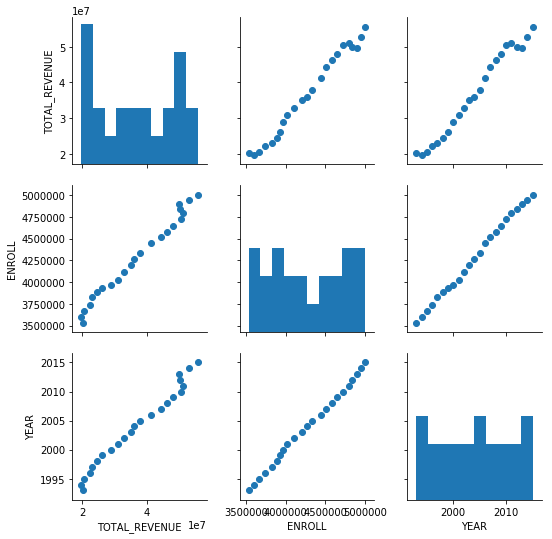

In [18]:
g = sns.PairGrid(df[df.STATE == 'Texas'], vars = ['TOTAL_REVENUE', 'ENROLL', 'YEAR'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)